In [1]:
import os
import pandas as pd
import numpy as np
from ast import literal_eval
%matplotlib inline
import matplotlib.pyplot as plt
from shutil import copyfile
from utils.visualization_utils import generic_plot, Curve, format_xtick, generic_sub_plot, Plot
from utils.data_utils import select_data
from learning_models.torch_sir import SirEq
from torch_euler import Heun, euler
import torch
from populations import populations

#print(populations)

In [2]:
exp_dir = os.path.join("regioni_sir")
best_path = os.path.join(os.getcwd(), exp_dir, "best")
if not os.path.exists(best_path):
    os.mkdir(best_path)

In [3]:
regions = [
    "Abruzzo",
    "Basilicata",
    "Calabria",
    "Campania",
    "Emilia-Romagna",
    "Friuli Venezia Giulia",
    "Lazio",
    "Liguria",
    "Lombardia",
    "Marche",
    "Molise",
    "P.A. Bolzano",
    "P.A. Trento",
    "Piemonte",
    "Puglia",
    "Sardegna",
    "Sicilia",
    "Toscana",
    "Umbria",
    "Valle d'Aosta",
    "Veneto"
]

#regions = regions[0:2]

In [4]:
def get_scores_path(region):
    return os.path.join(exp_dir, region, "scores.csv")

def get_df(region):
    path = get_scores_path(region)
    df = pd.read_csv(path, sep="\t")
    return df[(df.use_alpha == False)]
    
def get_best_exp(df):
    return df[df.val_risk == df.val_risk.min()]

def print_best_exp_info(df):
    best_exp = get_best_exp(df)
    best_exp_name = best_exp.name.values[0]
    print(best_exp.val_risk)
    print(best_exp.test_risk)
    print(best_exp.dataset_risk)

    print(best_exp_name)

In [5]:
def compute_r0(df, t):
    df["r0_t" + str(t)] = df["final_beta_t" + str(t)] / df["final_gamma_t0"]
    
def get_list_from_column(df, raw_pos, column, max_size):
    col_val = df[column].iloc[raw_pos]
    x = literal_eval(col_val)
    return x +  [-1.0]*(max_size - len(x))

def get_res_parameters(scores_df, params=("beta", "gamma", "delta")):
    max_len = scores_df["train_size"].max()
    p_columns = ["final_" + p + "_t" + str(i) for p in params for i in range(max_len)]
    score_columns = list(set(scores_df.columns) - set(params))
    #     params_df.at[:, score_columns] = scores_df.loc[:, score_columns] # copies everything in the first columns
    
    rows = []
    for i in range(scores_df.shape[0]):
        # create rows
        values = []
        for p in params:
            val = get_list_from_column(scores_df, i, p, max_len)
            values.extend(val)
        rows.append(list(scores_df.iloc[i][score_columns]) + values)
        
    
    params_df = pd.DataFrame(rows, columns=score_columns + p_columns)
    
    for p in p_columns:
        #print(params_df[p])
        params_df.loc[params_df[p] == -1, p] = None

    for t in range(max_len):
        compute_r0(params_df, t)
    
    return params_df, p_columns

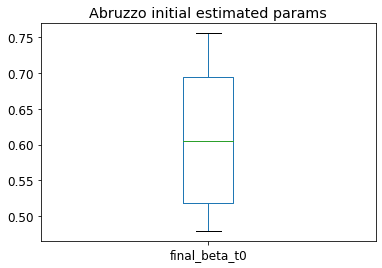

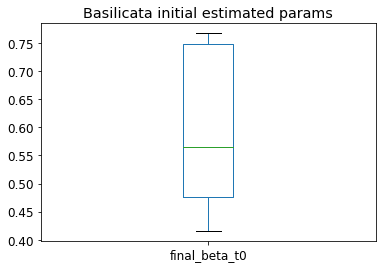

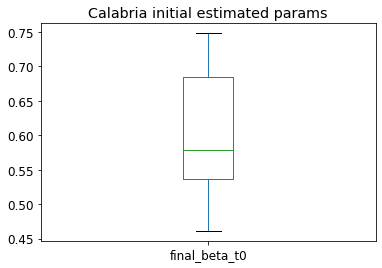

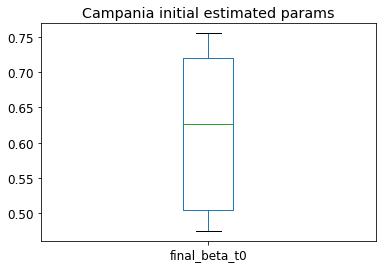

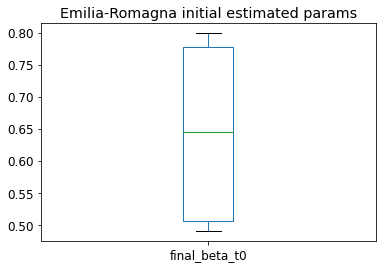

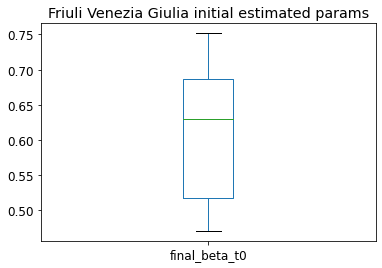

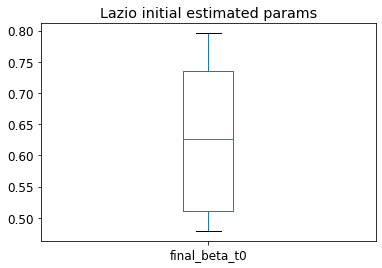

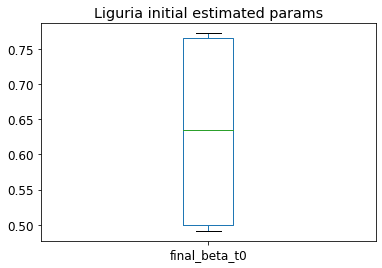

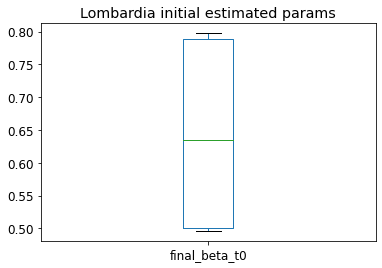

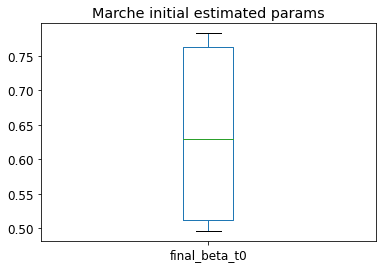

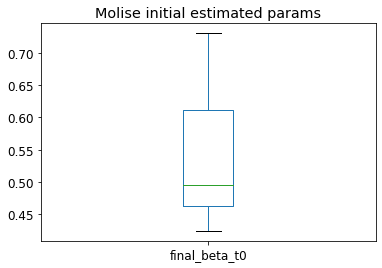

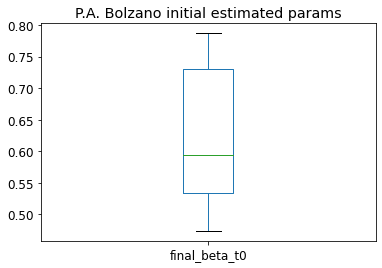

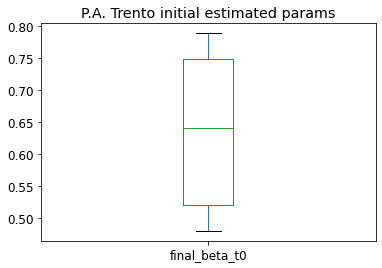

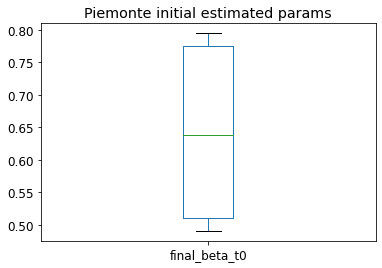

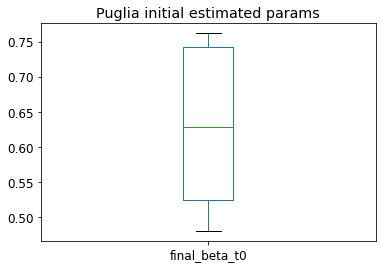

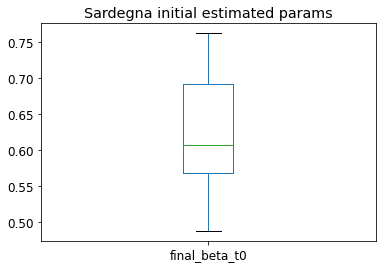

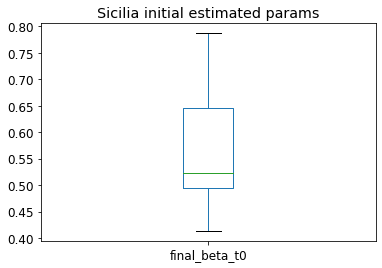

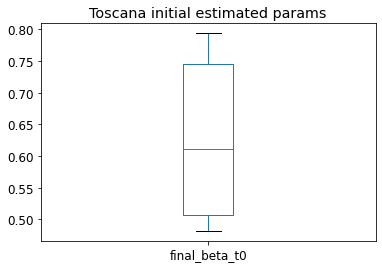

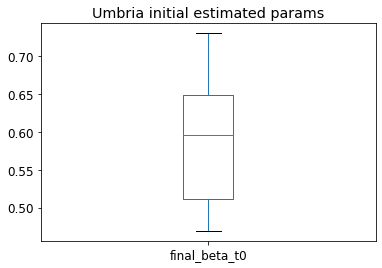

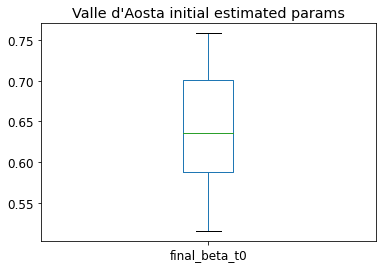

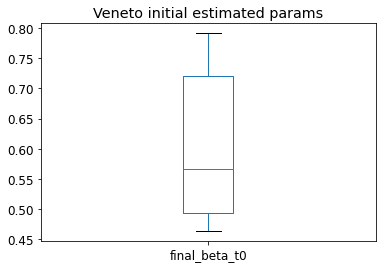

In [6]:
for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    params_df[["final_beta_t0"]].plot.box(title=region +" initial estimated params")

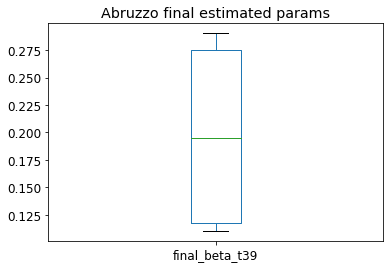

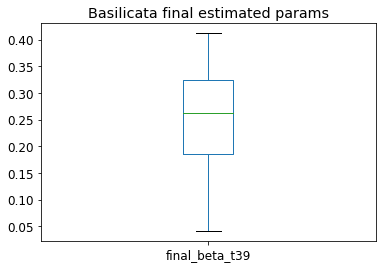

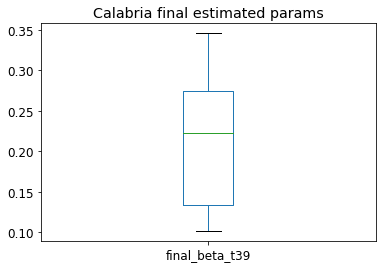

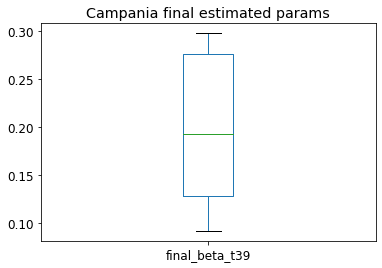

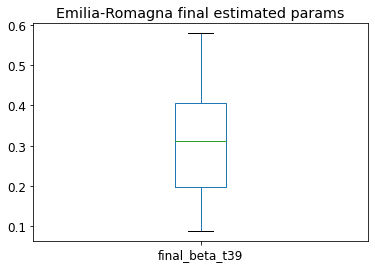

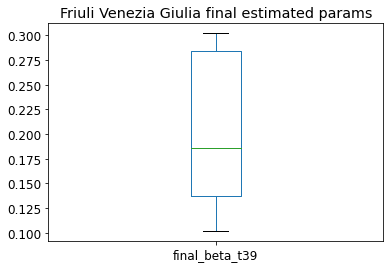

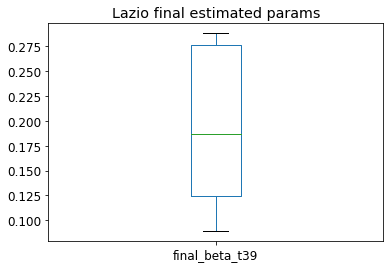

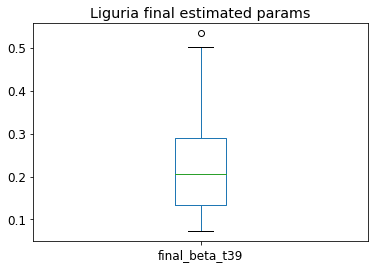

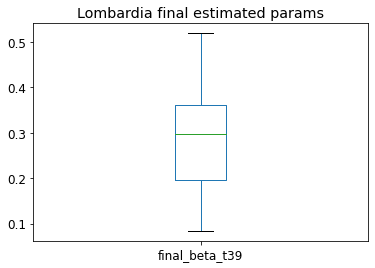

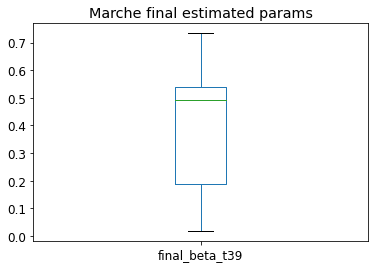

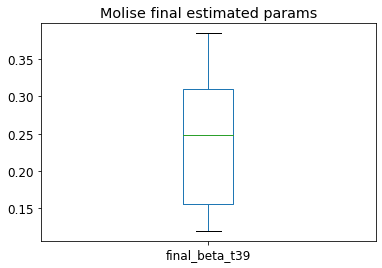

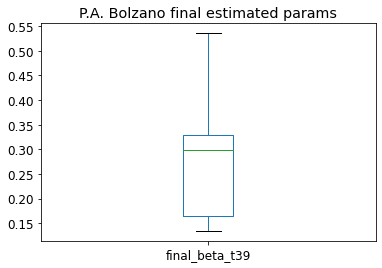

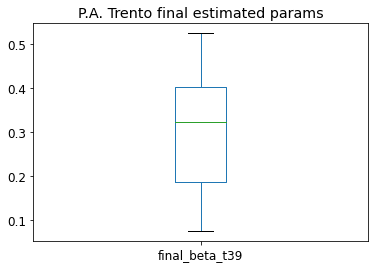

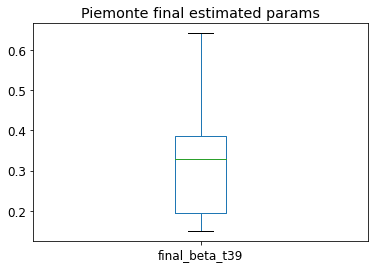

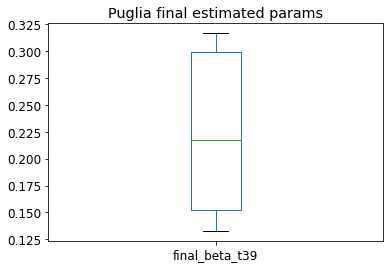

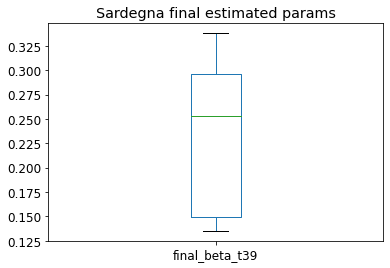

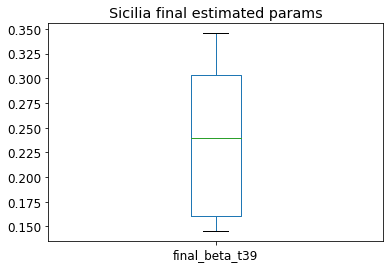

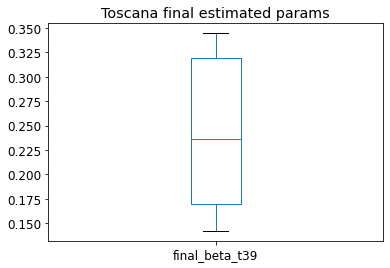

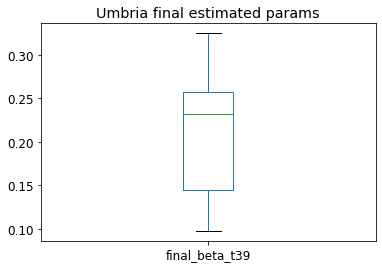

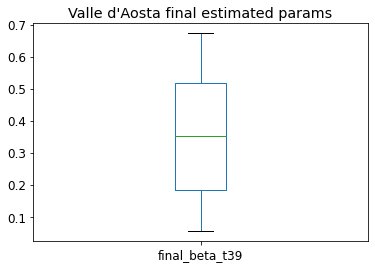

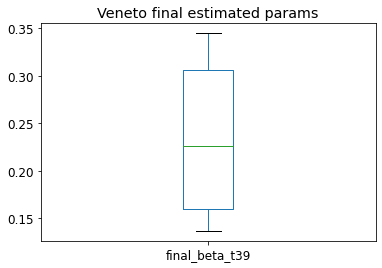

In [7]:

for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    params_df[["final_beta_t39"]].plot.box(title=region + " final estimated params")

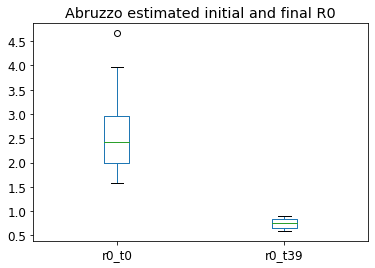

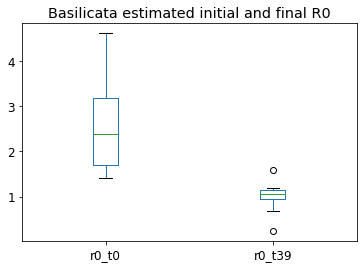

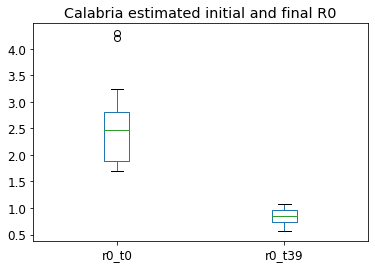

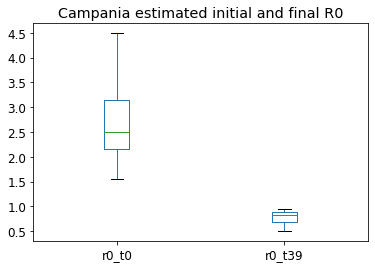

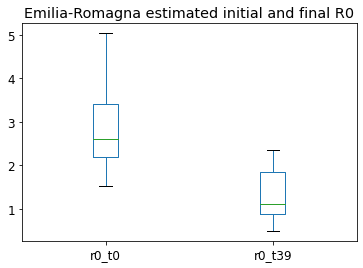

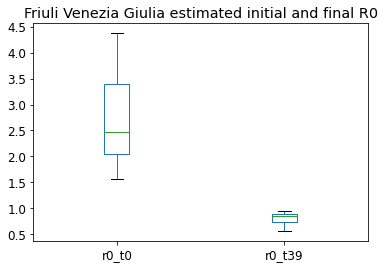

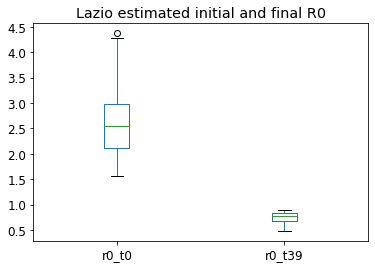

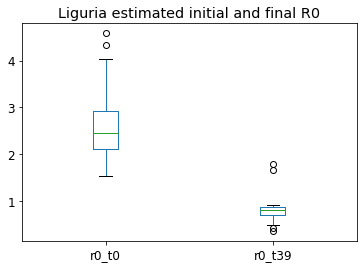

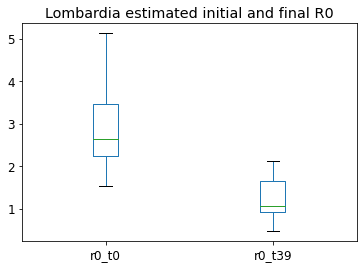

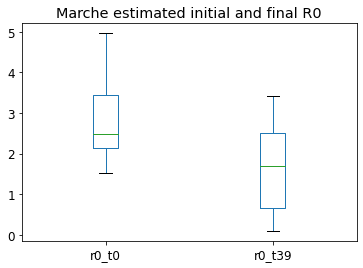

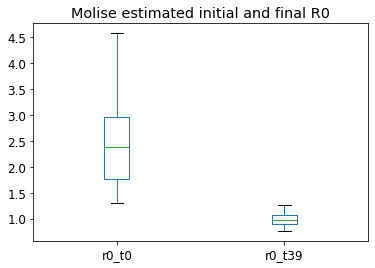

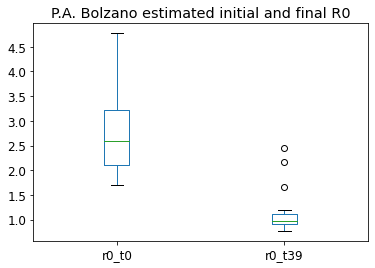

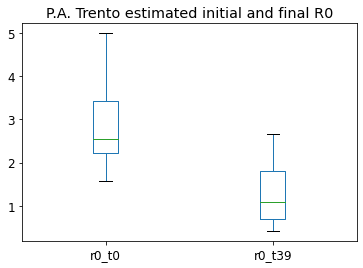

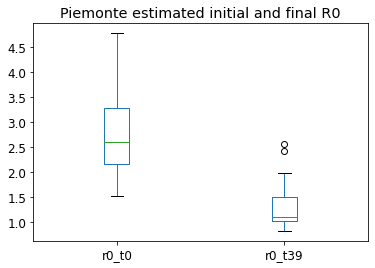

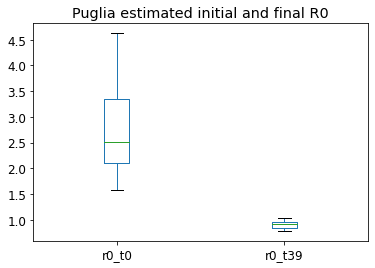

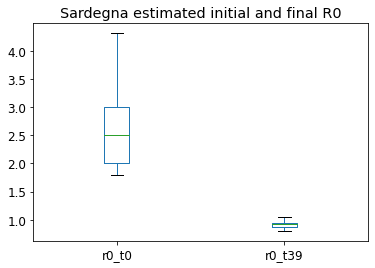

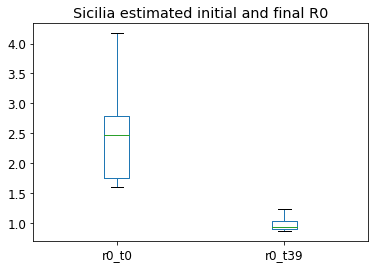

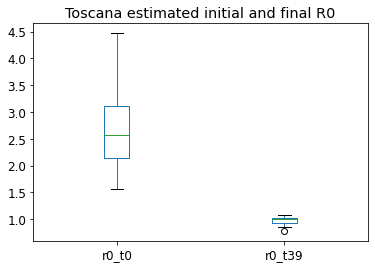

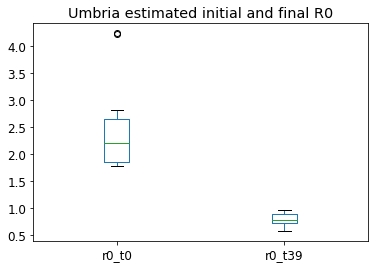

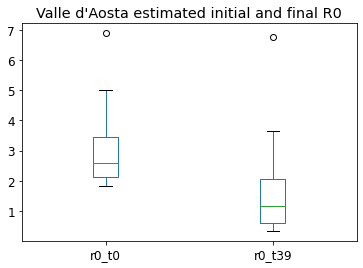

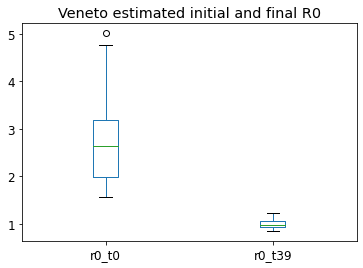

In [8]:
for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    params_df[["r0_t0", "r0_t39"]].plot.box(title=region +" estimated initial and final R0")

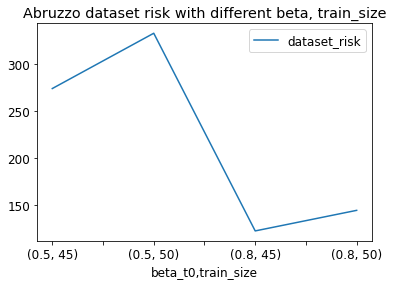

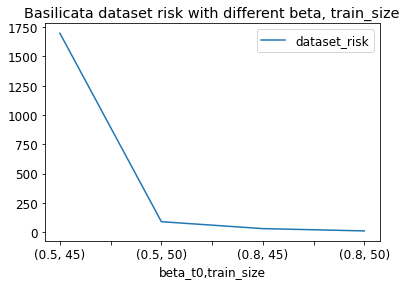

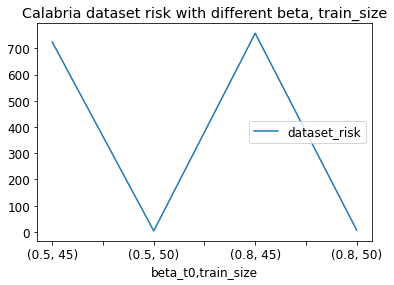

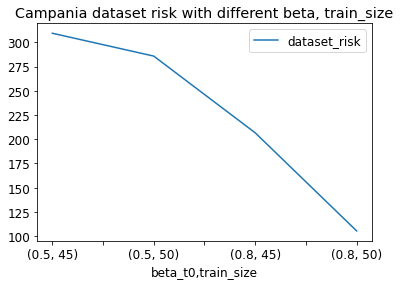

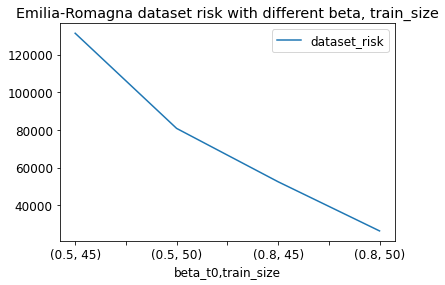

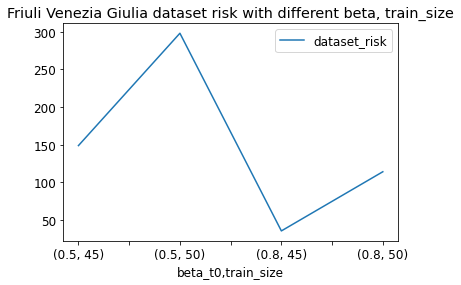

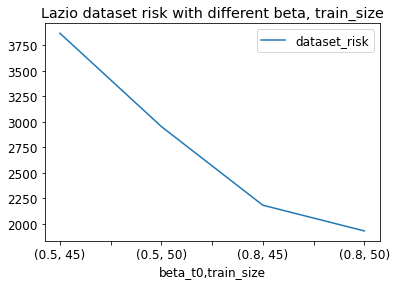

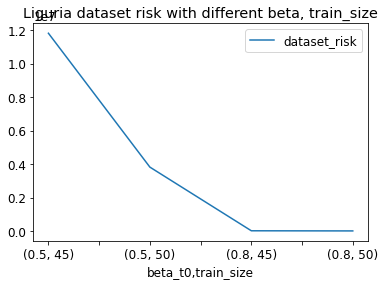

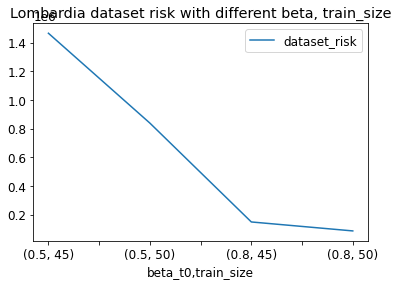

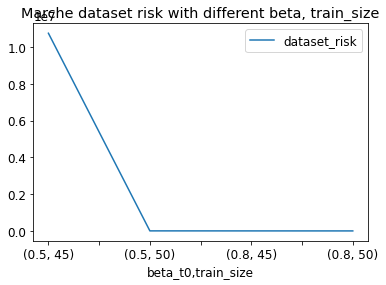

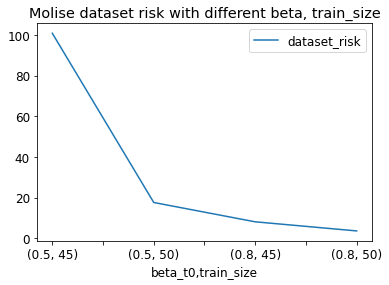

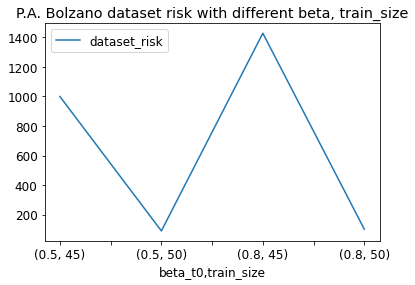

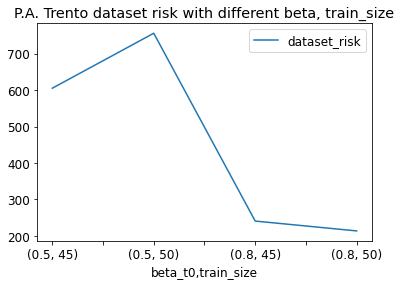

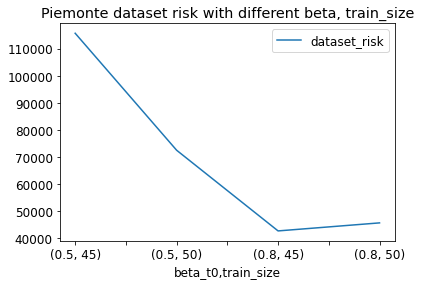

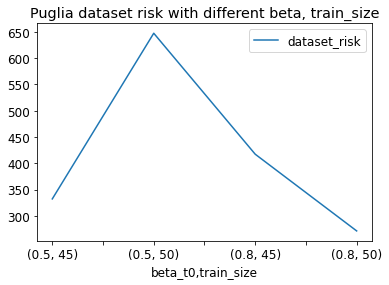

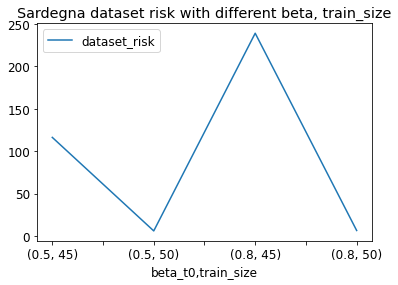

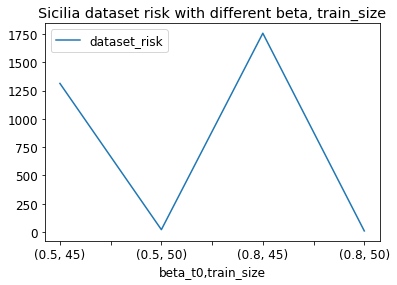

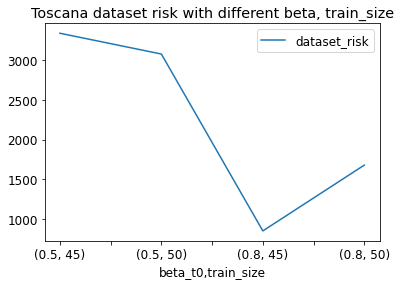

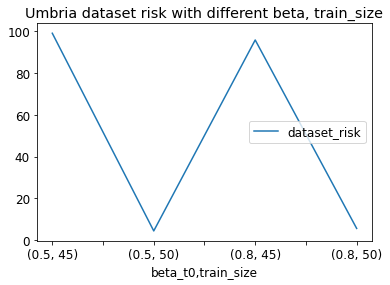

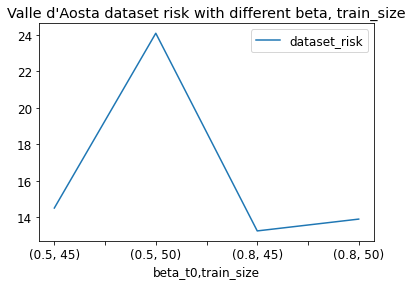

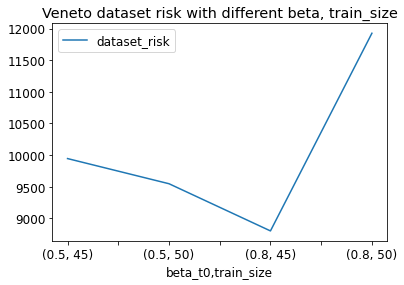

In [9]:
for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    params_df.groupby(["beta_t0","train_size"])[["dataset_risk"]].mean().plot(title=region + " dataset risk with different beta, train_size", legend=True)

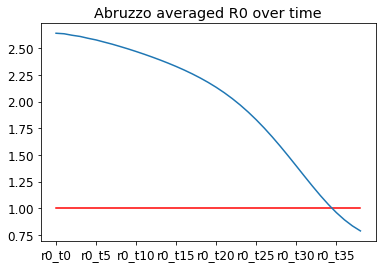

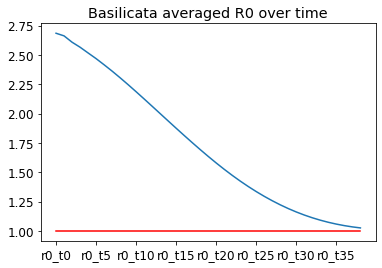

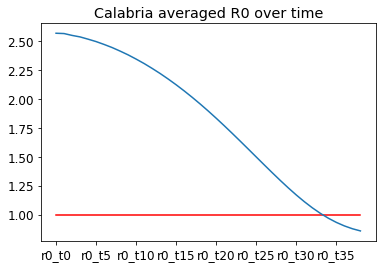

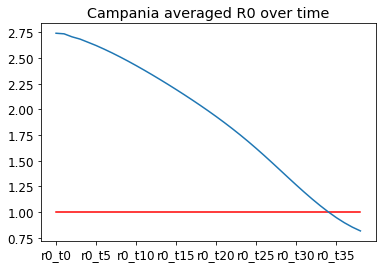

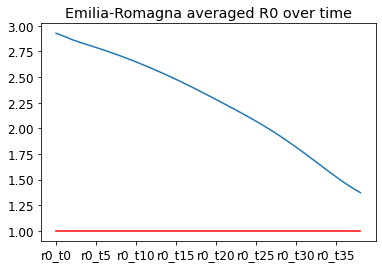

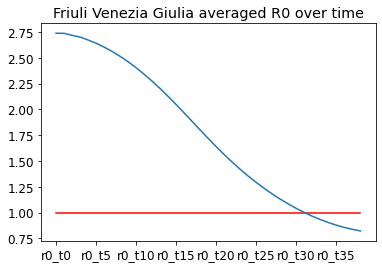

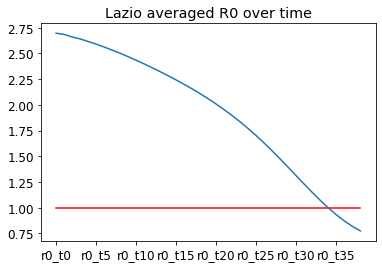

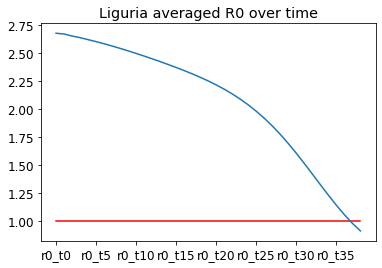

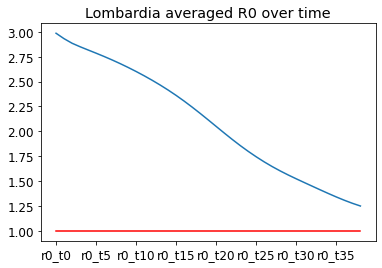

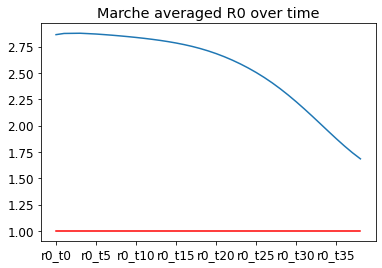

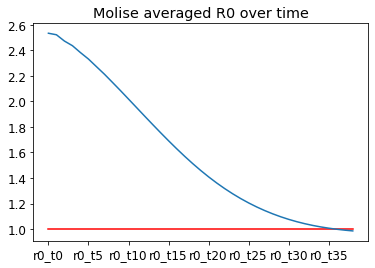

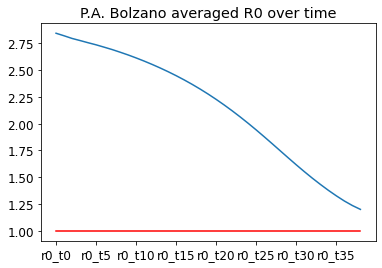

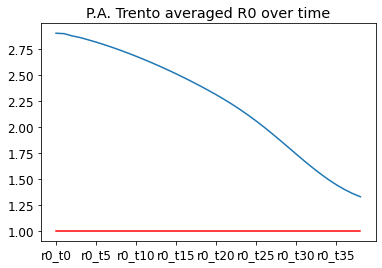

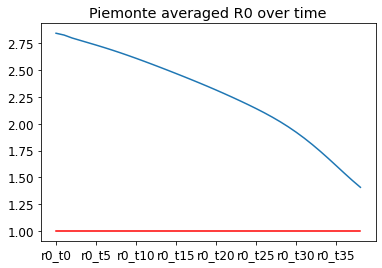

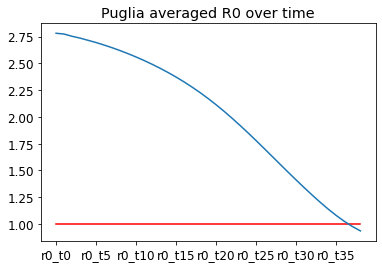

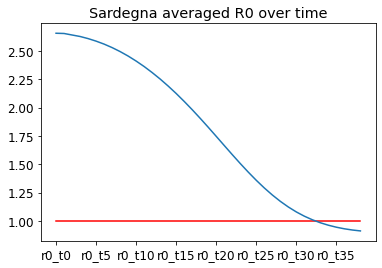

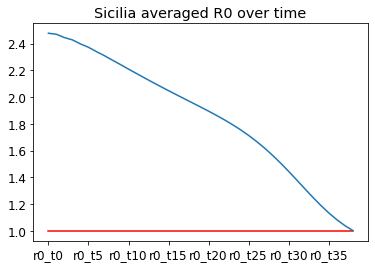

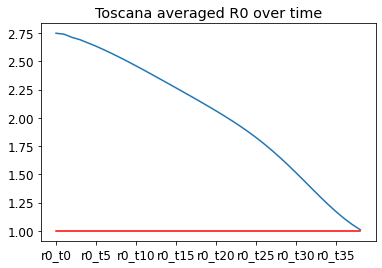

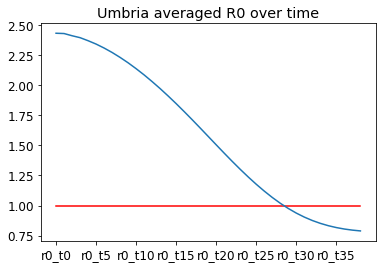

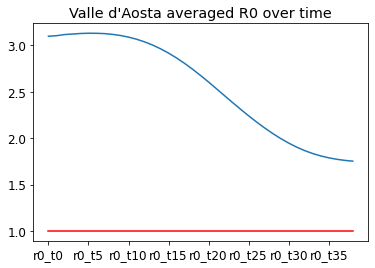

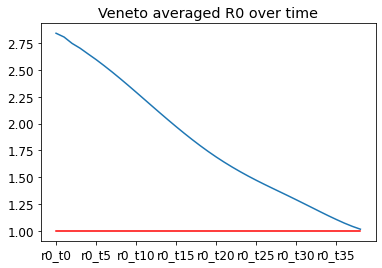

In [10]:
for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    fig, ax = plt.subplots()
    r0_cols = ["r0_t"+ str(t) for t in range(39)]
    ax.plot([1.0]*len(r0_cols), '-r')
    params_df[r0_cols].mean().plot(ax=ax, title=region + " averaged R0 over time")

A_Heun__b0.8_g0.3_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
B_Heun__b0.8_g0.15_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
C_Heun__b0.8_g0.3_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
C_Heun__b0.8_g0.3_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts50_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
E_Heun__b0.8_g0.3_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
F_Heun__b0.5_g0.3_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_nd_der0_t_inc1.0_use_alphaFalse_y_loss_weight0.0_m0.3_a1.0_b0.075
L_Heun__b0.8_g0.15_d0.03_lrb0.0001_lrg1e-05_lrd3e-06_lra0.001_ts45_vl15_st_der100000.0_

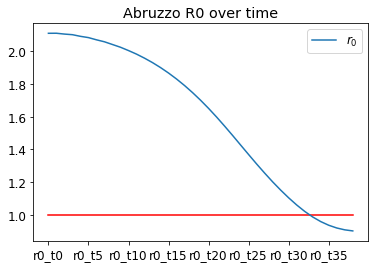

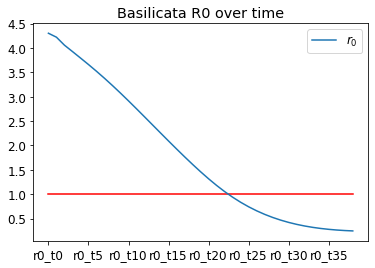

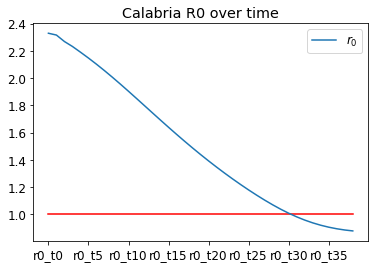

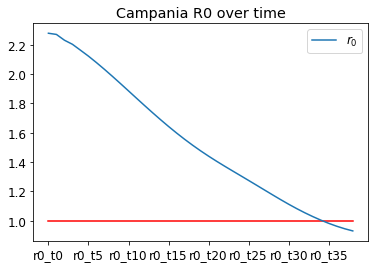

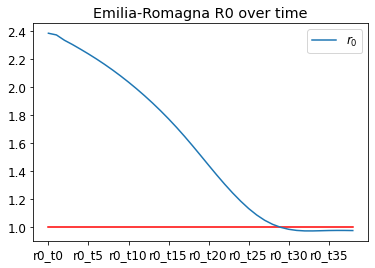

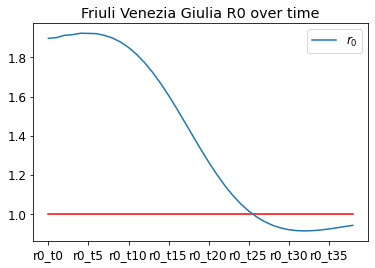

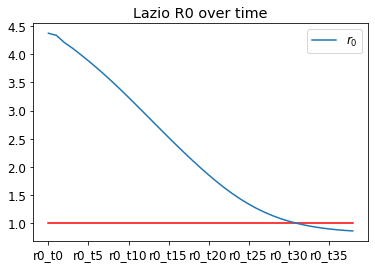

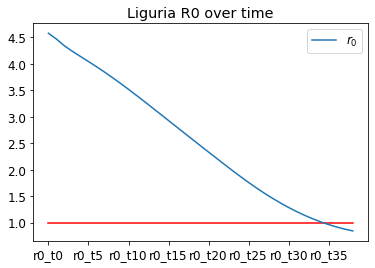

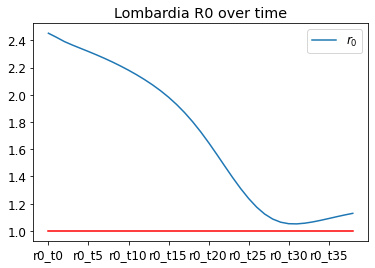

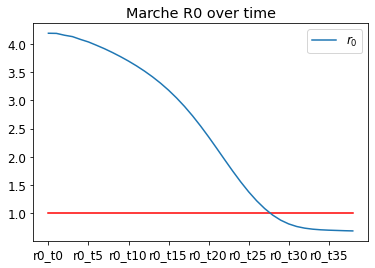

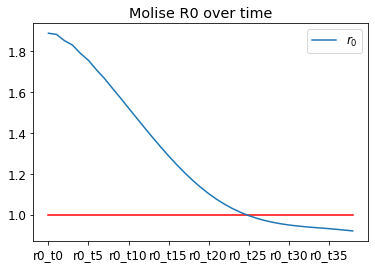

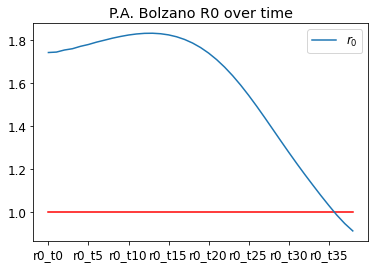

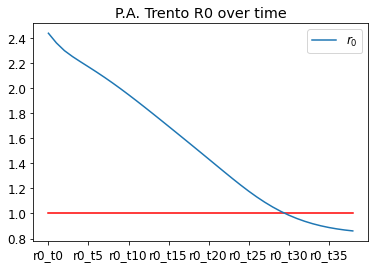

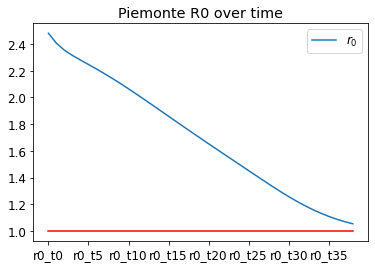

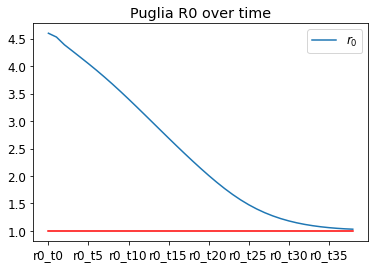

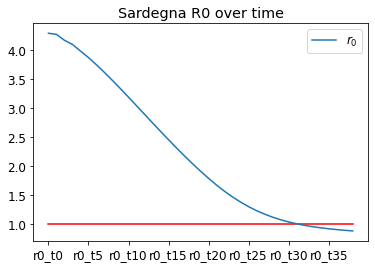

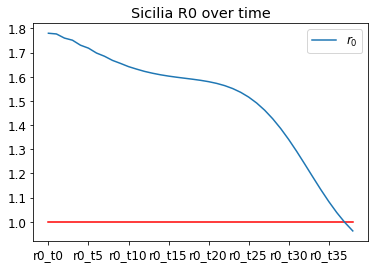

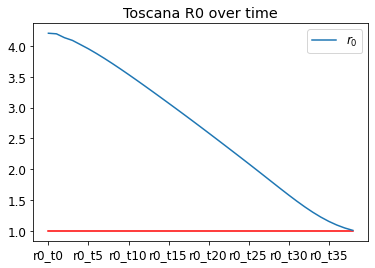

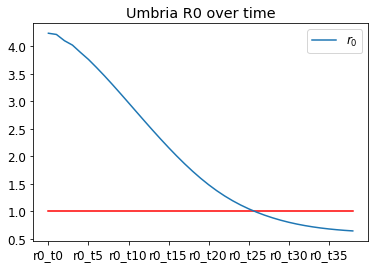

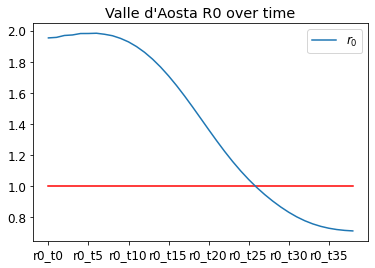

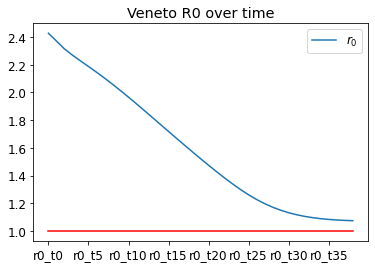

In [11]:
for region in regions:
    # R0 of single experiment
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    exp_id = params_df.val_risk.idxmin()
    print(params_df.iloc[exp_id]["name"])
    r0_cols = ["r0_t"+ str(t) for t in range(39)]
    fig, ax = plt.subplots()
    ax.plot([1.0]*len(r0_cols), '-r')
    params_df[r0_cols].iloc[exp_id].plot(ax=ax, label="$r_0$", legend=True, title=region + " R0 over time")
    plt.savefig(os.path.join(best_path, f"{region}_r0.png"), transparent=True)

In [12]:
def get_target(region):
    df_path = os.path.join(os.getcwd(), "COVID-19", "dati-regioni", "dpc-covid19-ita-regioni.csv")
    area = [region]  # list(df["denominazione_regione"].unique())
    area_col_name = "denominazione_regione"  # "Country/Region"
    value_col_name = "deceduti"  # "Fatalities"
    groupby_cols = ["data"]  # ["Date"]
    x_target, w_target = select_data(df_path, area, area_col_name, value_col_name, groupby_cols, file_sep=",")
    _, y_target = select_data(df_path, area, area_col_name, "totale_positivi", groupby_cols, file_sep=",")
    _, healed = select_data(df_path, area, area_col_name, "dimessi_guariti", groupby_cols, file_sep=",")
    
    tmp_y, tmp_w, tmp_h = [], [], []
    for i in range(len(y_target)):
        if y_target[i] > 0:
            tmp_y.append(y_target[i])
            tmp_w.append(w_target[i])
            tmp_h.append(healed[i])
    y_target = tmp_y
    w_target = tmp_w
    healed = tmp_h
    return w_target, y_target, healed

In [47]:
mapes = {}

for region in regions:
    df = get_df(region)
    best_exp = get_best_exp(df).iloc[0]
    beta = literal_eval(best_exp["beta"])
    gamma = literal_eval(best_exp["gamma"])
    delta = literal_eval(best_exp["delta"])
    train_size = best_exp["train_size"]
    val_len = best_exp["val_size"]
    t_inc = best_exp["t_inc"]
    use_alpha = best_exp["use_alpha"]
    integrator = euler if best_exp["integrator"] == "euler" else Heun 

    population = populations[region]
    
    w_target, y_target, healed = get_target(region)
    
    val_size = min(train_size + val_len, len(w_target) - 5)  # validation on the next val_len days (or less if we have less data)
    dataset_size = len(w_target)
    exp_prefix = region + "_best"
    
    dy_params = {"t_start": 0, "t_end": train_size}
    
    # init parameters
    epsilon = y_target[0].item() / population
    epsilon_z = w_target[0].item() / population
    S0 = 1 - (epsilon + epsilon_z)
    I0 = epsilon
    S0 = S0 * population
    I0 = I0 * population
    Z0 = epsilon_z

    init_cond = (S0, I0, Z0)  # initialization of SIR parameters (Suscettible, Infected, Recovered)
    sir = SirEq(beta, gamma, delta, population, init_cond=init_cond, integrator=integrator)
    
    w_hat, y_hat, sol = sir.inference(torch.arange(dy_params["t_start"], 100, t_inc))
    
    train_slice = slice(dy_params["t_start"], int(train_size/t_inc), int(1/t_inc))
    val_slice = slice(int(train_size/t_inc), int(val_size/t_inc), int(1/t_inc))
    test_slice = slice(int(val_size/t_inc), int(dataset_size/t_inc), int(1/t_inc))
    dataset_slice = slice(dy_params["t_start"], int(dataset_size/t_inc), int(1/t_inc))

    w_hat_train, w_hat_val, w_hat_test = w_hat[train_slice], w_hat[val_slice], w_hat[test_slice]
    w_hat_dataset = w_hat[dataset_slice]
    y_hat_train, y_hat_val, y_hat_test = y_hat[train_slice], y_hat[val_slice], y_hat[test_slice]
    y_hat_dataset = y_hat[dataset_slice]

    train_risk, train_w_risk, train_y_risk, _ = sir.loss(w_hat_train, w_target[dy_params["t_start"]:train_size],
                                                         y_hat_train, y_target[dy_params["t_start"]:train_size])

    validation_risk, validation_w_risk, validation_y_risk, _ = sir.loss(w_hat_val, w_target[dy_params["t_end"]:val_size],
                                                                        y_hat_val, y_target[dy_params["t_end"]:val_size])

    test_risk, test_w_risk, test_y_risk, _ = sir.loss(w_hat_test, w_target[val_size:dataset_size],
                                                      y_hat_test, y_target[val_size:dataset_size])

    dataset_risk, _, _, _ = sir.loss(w_hat_dataset, w_target[dy_params["t_start"]:dataset_size],
                                     y_hat_dataset, y_target[dy_params["t_start"]:dataset_size])

    with torch.no_grad():
        train_mape = sir.mape(w_hat_train, w_target[dy_params["t_start"]:train_size])
        val_mape = sir.mape(w_hat_val, w_target[dy_params["t_end"]:val_size])
        test_mape = sir.mape(w_hat_test, w_target[val_size:dataset_size])

        mapes[region] = {
            "train": train_mape.numpy(),
            "val": val_mape.numpy(),
            "test": test_mape.numpy()
        }
    
    file_format = ".png"
    exp_path = best_path
    
    #initial vals
    pl_x = list(range(train_size))  # list(range(len(beta)))
    beta_pl = Curve(pl_x, sir.beta.detach().numpy(), '-g', "$\\beta$")
    gamma_pl = Curve(pl_x, [sir.gamma.detach().numpy()]*train_size, '-r', "$\gamma$")
    delta_pl = Curve(pl_x, [sir.delta.detach().numpy()]*train_size, '-b', "$\delta$")
    params_curves = [beta_pl, gamma_pl, delta_pl]
    bgd_pl_title = "$\\beta, \gamma, \delta$  ({}".format(str(region)) + str(")")
    bgd_pl_path = os.path.join(exp_path, exp_prefix + "_bcd_over_time" + file_format)
    fig = generic_plot(params_curves, bgd_pl_title, bgd_pl_path, formatter=format_xtick)
    

    # R0
    pl_x = list(range(len(beta)))
    if use_alpha:
        alpha = np.concatenate([sir.alpha(sir.get_policy_code(t)).detach().numpy().reshape(1) for t in range(len(sir.beta))], axis=0)
        r0_pl = Curve(pl_x, (alpha * sir.beta.detach().numpy())/sir.gamma.detach().numpy(), '-', label="$R_0$")
    else:
        r0_pl = Curve(pl_x, sir.beta.detach().numpy()/sir.gamma.detach().numpy(), '-', label="$R_0$")

    thresh_r0_pl = Curve(pl_x, [1.0]*len(pl_x), '-', color="magenta")

    r0_pl_title = '$R_0$  ({}'.format(str(region)) + str(")")
    r0_pl_path = os.path.join(exp_path, exp_prefix + "_r0" + file_format)

    fig = generic_plot([r0_pl, thresh_r0_pl], r0_pl_title, r0_pl_path, formatter=format_xtick)
    
    # normalize wrt population
    w_hat = w_hat[dataset_slice].detach().numpy() / population
    RES = sol.detach().numpy() / population
    print(len(RES[:,0]))
    _y = [_v / population for _v in y_target]
    _w = [_v / population for _v in w_target]
    _healed = [_v / population for _v in healed]

    # SIR dynamic
    recovered = np.array(_healed) +  np.array(_w)
    assert(len(RES[:, 0]) == len(RES[:, 1]) == len(RES[:, 2]))
    sir_len = len(RES[:, 0])
    pl_sir_x = np.array(list(range(sir_len))) * t_inc
    assert(len(_w) == len(_y) == len(_healed))
    sir_truth_len = len(_w)
    pl_sir_truth_x = np.array(list(range(sir_truth_len)))

    sir_dir_path = os.path.join(exp_path, exp_prefix + "_SIR_global" + file_format)
    # plot_sir_dynamic(RES[:, 0], RES[:, 1], RES[:, 2], area[0], sir_dir_path)
    s_fit_curve = Curve(pl_sir_x, RES[:, 0], '-g', label='$x$')
    s_truth = np.ones(len(_w))-( np.array(_y) + recovered )
    s_truth_points = Curve(pl_sir_truth_x, s_truth, '.g', label='$x$')
    s_curves = [s_fit_curve, s_truth_points]
    s_sub_pl = Plot(x_label=None, y_label="S", use_grid=True, use_legend=True, curves=s_curves, bottom_adjust=0.15, margins=0.05, formatter=format_xtick,
                    h_pos=1, v_pos=1)
    i_fit_curve = Curve(pl_sir_x, RES[:, 1], '-r', label='$y$')
    i_truth_points = Curve(pl_sir_truth_x, _y, '.r', label='$y$')
    i_curves = [i_fit_curve, i_truth_points]
    i_sub_pl = Plot(x_label=None, y_label="I", use_grid=True, use_legend=True, curves=i_curves, bottom_adjust=0.15, margins=0.05, formatter=format_xtick,
                    h_pos=1, v_pos=2)
    r_fit_curve = Curve(pl_sir_x, RES[:, 2], '-k', label='$z$')
    r_truth_points = Curve(pl_sir_truth_x, recovered, '.k', label='$z$')
    r_curves = [r_fit_curve, r_truth_points]
    r_sub_pl = Plot(x_label=None, y_label="R", use_grid=True, use_legend=True, curves=r_curves, bottom_adjust=0.15, margins=0.05, formatter=format_xtick,
                    h_pos=1, v_pos=3)
    sir_title = 'SIR  ({}'.format(region) + str(")")
    fig = generic_sub_plot([s_sub_pl, i_sub_pl, r_sub_pl], sir_title, sir_dir_path)
    
    
    # Deaths
    pl_w_hat = list(range(len(w_hat)))
    w_hat_pl = Curve(pl_w_hat, w_hat, '-', label='$w$')

    deaths_pl_title = 'Deaths  ({}'.format(str(region)) + str(")")
    deaths_pl_path = os.path.join(exp_path, exp_prefix + "_W_global" + file_format)

    fig = generic_plot([w_hat_pl], deaths_pl_title, deaths_pl_path, 'Time in days', 'Deaths')
    
    
    """
    def get_hat_list(start, end):
        return list(range(int(start/t_inc), int(end/t_inc)))
    
    
    y_fits = Curve(get_hat_list(0, train_size), RES[:train_size, 1], '-r', label='$y$ fit')
    y_val_preds = Curve(get_hat_list(train_size, val_size), RES[train_size:val_size, 1], '-r', color='darkblue', label='$y$ validation')
    y_test_preds = Curve(get_hat_list(val_size, dataset_size), RES[val_size:dataset_size, 1], '-r', color='orange', label='$y$ prediction')
    y_truth_train = Curve(list(range(train_size)), _y[:train_size], '.r', label='$\hat{y}$ fit')
    y_truth_val = Curve(list(range(train_size, val_size)), _y[train_size:val_size], '.', color="darkblue", label='$\hat{y}$ validation')
    y_truth_test = Curve(list(range(val_size, dataset_size)), _y[val_size:dataset_size], '.', color="orange", label='$\hat{y}$ prediction')
    """
    
    y_hat = RES[:,1]
    
    # Infectious Train/Test/Real
    y_fits = Curve(list(range(train_size)), y_hat[train_slice], '-r', label='$y$ fit')
    y_val_preds = Curve(list(range(train_size, val_size)), y_hat[val_slice], '-r', color='darkblue', label='$y$ validation')
    y_test_preds = Curve(list(range(val_size, dataset_size)), y_hat[test_slice], '-r', color='orange', label='$y$ prediction')
    y_truth_train = Curve(list(range(train_size)), _y[:train_size], '.r', label='$\hat{y}$ fit')
    y_truth_val = Curve(list(range(train_size, val_size)), _y[train_size:val_size], '.', color="darkblue", label='$\hat{y}$ validation')
    y_truth_test = Curve(list(range(val_size, dataset_size)), _y[val_size:dataset_size], '.', color="orange", label='$\hat{y}$ prediction')

    infected_pl_title = 'Infectious  ({}'.format(str(region)) + str(")")
    infected_pl_path = os.path.join(exp_path, exp_prefix + "_I_fit" + file_format)

    fig = generic_plot([y_fits, y_val_preds, y_test_preds, y_truth_train, y_truth_val, y_truth_test], infected_pl_title, infected_pl_path, y_label='Infectious', formatter=format_xtick)
    
    
    
    # Deaths Train/Test/Real
    w_fits = Curve(list(range(train_size)), w_hat[:train_size], '-', label='$w$ fit')
    w_val_preds = Curve(list(range(train_size, val_size)), w_hat[train_size:val_size], '-', color='darkblue', label='$w$ validation')
    w_test_preds = Curve(list(range(val_size, dataset_size)), w_hat[val_size:dataset_size], '-', color='orange', label='$w$ prediction')
    w_truth_train = Curve(list(range(train_size)), _w[:train_size], '.r', label='$\hat{w}$ fit')
    w_truth_val = Curve(list(range(train_size, val_size)), _w[train_size:val_size], '.', color="darkblue", label='$\hat{w}$ validation')
    w_truth_test = Curve(list(range(val_size, dataset_size)), _w[val_size:dataset_size], '.', color="orange", label='$\hat{w}$ prediction')

    w_pl_title = 'Deaths  ({}'.format(str(region)) + str(")")
    w_pl_path = os.path.join(exp_path, exp_prefix + "_W_fit" + file_format)

    fig = generic_plot([w_fits, w_val_preds, w_test_preds, w_truth_train, w_truth_val, w_truth_test], w_pl_title, w_pl_path, y_label="Deaths", formatter=format_xtick)

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [14]:
# for region in regions:
#    df = get_df(region)
#    print_best_exp_info(df)"""

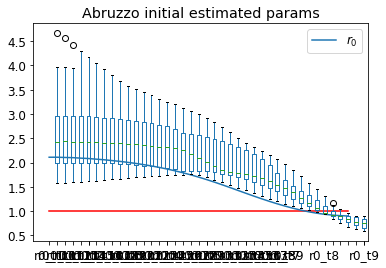

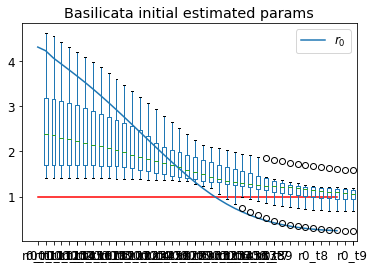

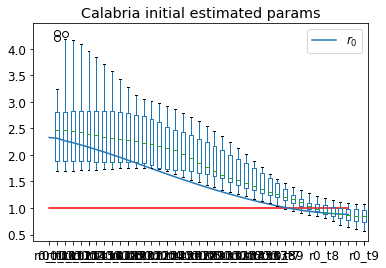

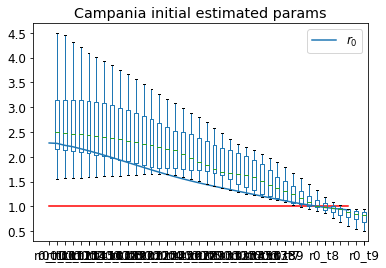

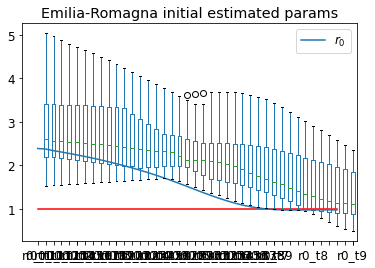

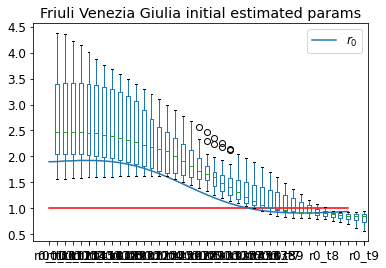

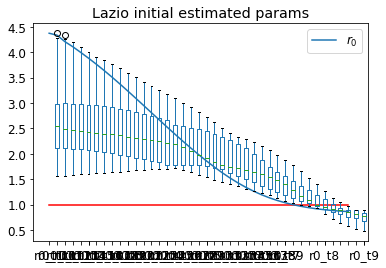

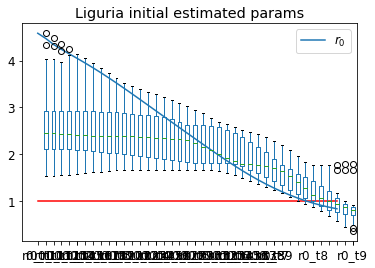

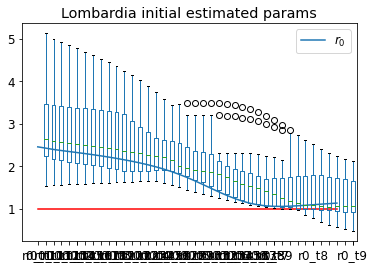

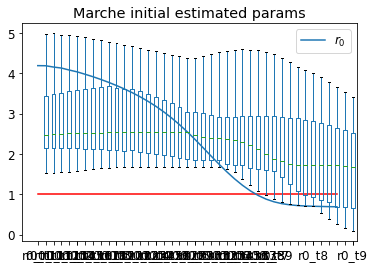

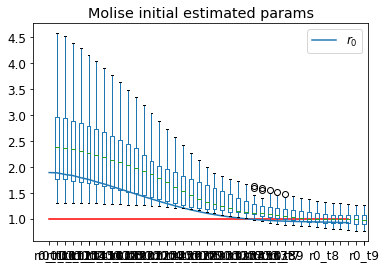

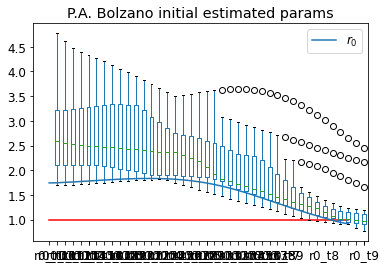

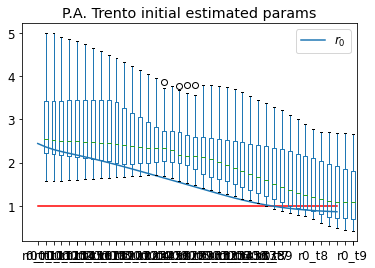

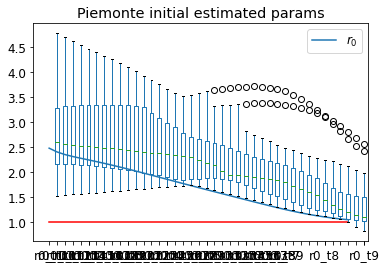

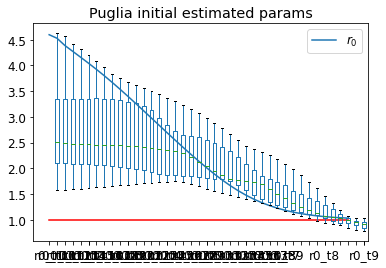

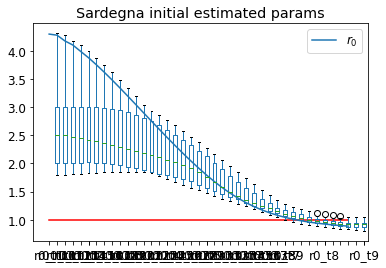

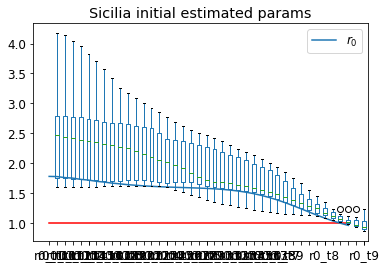

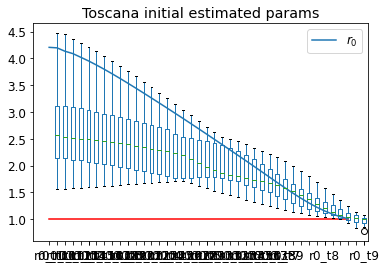

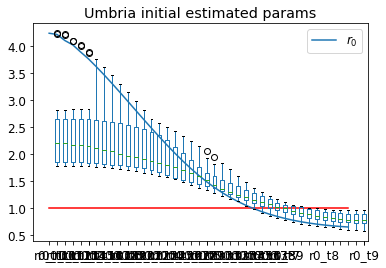

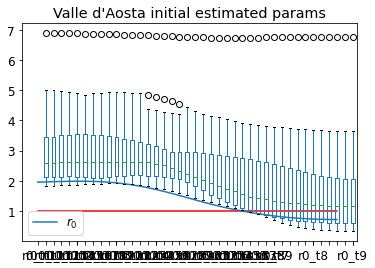

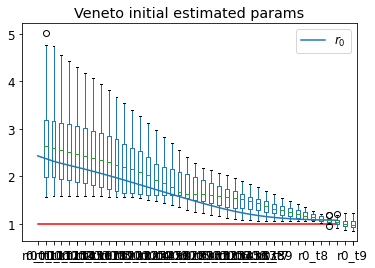

In [15]:
for region in regions:
    df = get_df(region)
    params_df, p_columns = get_res_parameters(df)
    lst = [f"r0_t{i}" for i in range(0,40)]
    exp_id = params_df.val_risk.idxmin()
    #print(params_df.iloc[exp_id]["name"])
    r0_cols = ["r0_t"+ str(t) for t in range(39)]
    fig, ax = plt.subplots()
    ax.plot([1.0]*len(r0_cols), '-r')
    params_df[r0_cols].iloc[exp_id].plot(ax=ax, label="$r_0$", legend=True, title=region +" initial estimated params")
    params_df[lst].plot.box(ax=ax, title=region +" initial estimated params")
    #plt.plot(r0_t)

In [16]:
beta_hash, gamma_hash, delta_hash, tot_hash, ts_hash = {}, {}, {}, {}, {}
for region in regions:
    df = get_df(region)
    best_per_region = get_best_exp(df)
    
    best_beta =  float(best_per_region.beta_t0.values)
    if best_beta not in beta_hash:
        beta_hash[best_beta] = 0
    beta_hash[best_beta] += 1
    
    best_gamma =  float(best_per_region.gamma_t0.values)
    if best_gamma not in gamma_hash:
        gamma_hash[best_gamma] = 0
    gamma_hash[best_gamma] += 1
    
    best_delta =  float(best_per_region.delta_t0.values)
    if best_delta not in delta_hash:
        delta_hash[best_delta] = 0
    delta_hash[best_delta] += 1

    tot = f"{best_beta}_{best_gamma}_{best_delta}"
    if tot not in tot_hash:
        tot_hash[tot] = 0
    tot_hash[tot] += 1
    
    ts = int(best_per_region.train_size.values)
    if ts not in ts_hash:
        ts_hash[ts] = 0
    ts_hash[ts] += 1



    
print(beta_hash)
print(gamma_hash)
print(delta_hash)
print(tot_hash)   
print(ts_hash)
    

{0.8: 18, 0.5: 3}
{0.3: 13, 0.15: 8}
{0.03: 18, 0.01: 3}
{'0.8_0.3_0.03': 8, '0.8_0.15_0.03': 7, '0.5_0.3_0.03': 3, '0.8_0.3_0.01': 2, '0.8_0.15_0.01': 1}
{45: 11, 50: 10}


In [44]:
print("Region & R0 & RT & Train risk & Validation risk & Test risk")
for region in regions:
    df = get_df(region)
    df = get_best_exp(df)
    params_df, p_columns = get_res_parameters(df)
    r_t = params_df["r0_t44"].item()
    if r_t >= 1.:
        r_t = '\\textbf{'+ f'{r_t:.3f}'+'}'
    else:
        r_t = f'{r_t:.3f}'
    #print(df["train_risk"].item())
    print(f'{region} & {params_df["r0_t0"].item():.3f} & {r_t} & ' + \
        f'{df["train_risk"].item():.3f} & {df["val_risk"].item():.3f} & {df["test_risk"].item():.3f} \\\\')


Region & R0 & RT & Train risk & Validation risk & Test risk
Abruzzo & 2.110 & 0.900 & 3.248 & 2.169 & 45.408 \\
Basilicata & 4.301 & 0.178 & 17.732 & 0.230 & 1.279 \\
Calabria & 2.329 & 0.850 & 9.385 & 1.287 & 0.378 \\
Campania & 2.279 & 0.889 & 30.683 & 10.248 & 12.700 \\
Emilia-Romagna & 2.385 & 0.956 & 129.717 & 399.395 & 3881.016 \\
Friuli Venezia Giulia & 1.898 & 0.961 & 7.968 & 6.023 & 83.427 \\
Lazio & 4.371 & 0.802 & 4.213 & 26.864 & 4984.139 \\
Liguria & 4.580 & 0.739 & 316.703 & 2357.331 & 11143.770 \\
Lombardia & 2.452 & \textbf{1.170} & 14233.491 & 2366.962 & 111947.270 \\
Marche & 4.185 & 0.678 & 74.078 & 211.552 & 1141.328 \\
Molise & 1.889 & 0.913 & 0.761 & 0.322 & 0.630 \\
P.A. Bolzano & 1.744 & 0.835 & 14.708 & 1.505 & 16.509 \\
P.A. Trento & 2.439 & 0.842 & 43.638 & 2.877 & 1.783 \\
Piemonte & 2.481 & \textbf{1.007} & 666.508 & 149.965 & 45790.950 \\
Puglia & 4.598 & 0.974 & 33.582 & 14.991 & 2463.490 \\
Sardegna & 4.296 & 0.852 & 3.236 & 2.010 & 33.402 \\
Sicilia & 1

In [34]:
print("Regions with rT over 1.")
for region in regions:
    df = get_df(region)
    df = get_best_exp(df)
    params_df, p_columns = get_res_parameters(df)

    if(params_df["r0_t44"].item() >= 1.):
        print(f'{region}: {params_df["r0_t44"].item()}')

Regions with rT over 1.
Lombardia: 1.1696417897051006
Piemonte: 1.0066600225180742
Veneto: 1.0550699979081888


In [48]:
print(mapes)

{'Abruzzo': {'train': array(nan, dtype=float32), 'val': array(0.00675727, dtype=float32), 'test': array(0.03522335, dtype=float32)}, 'Basilicata': {'train': array(nan, dtype=float32), 'val': array(0.02177487, dtype=float32), 'test': array(0.04970602, dtype=float32)}, 'Calabria': {'train': array(nan, dtype=float32), 'val': array(0.01691747, dtype=float32), 'test': array(0.00844179, dtype=float32)}, 'Campania': {'train': array(nan, dtype=float32), 'val': array(0.01194808, dtype=float32), 'test': array(0.01137953, dtype=float32)}, 'Emilia-Romagna': {'train': array(nan, dtype=float32), 'val': array(0.00869365, dtype=float32), 'test': array(0.0184042, dtype=float32)}, 'Friuli Venezia Giulia': {'train': array(nan, dtype=float32), 'val': array(0.0117614, dtype=float32), 'test': array(0.03286998, dtype=float32)}, 'Lazio': {'train': array(nan, dtype=float32), 'val': array(0.01830128, dtype=float32), 'test': array(0.17042266, dtype=float32)}, 'Liguria': {'train': array(nan, dtype=float32), 'val'